<img src="gra.png" width=1500 height=2 />

Coronaviruses are important human and animal pathogens. At the end of 2019, a novel coronavirus was identified as the cause of a cluster of pneumonia cases in Wuhan, a city in the Hubei Province of China. It rapidly spread, resulting in an epidemic throughout China, followed by an increasing number of cases in other countries throughout the world. In February 2020, the World Health Organization designated the disease COVID-19, which stands for coronavirus disease 2019. The virus that causes COVID-19 is designated severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).  Previously, it was referred to as 2019-nCoV. Covid19 has been a talk of the town of the entire world. It has been focused of the government of every country to contain and to have the situation under control. Hence, every solution that can be obtained from all the discipline are important. Thus, the daily recorded data of Covid-19 observation cases is very crucial for data science practitioner to extract valuable insight that can be the key solution in taking prevention measures. Besides, of the challenge in getting  observation cases data regarding this pandemic, the data available structure also presents a challenge in conducting the analysis. Most of the timeseries Covid-19 data is pivoted – wide format with many columns. In addition, the observation case data is separated based on confirmed cases, death cases and recovered cases. This jupyter notebook is addressing these problems while importing the data from Johns Hopkins university repository data in GitHub.



In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
pio.templates.default = "plotly_dark"
import plotly.graph_objects as go


In [2]:
headers = [*pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", nrows=1)]
data_confirm = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",usecols = lambda col:col not in ['Province/State','Lat','Long'])

data_unpivoted_confirm = data_confirm.melt(var_name='date',id_vars=['Country/Region'], value_name='Confirm_Case')
data_unpivoted_confirm['date']= pd.to_datetime(data_unpivoted_confirm['date'])
data_unpivoted_confirm.columns = ["country","date","confirm_case"]
confirm = data_unpivoted_confirm.groupby(["date","country"])[['date','country', 'confirm_case']].sum().reset_index()

In [3]:
headers = [*pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", nrows=1)]
data_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",usecols = lambda col:col not in ['Province/State','Lat','Long'])

data_unpivoted_death = data_death.melt(var_name='date',id_vars=['Country/Region'], value_name='Death')
data_unpivoted_death['date']= pd.to_datetime(data_unpivoted_death['date'])
data_unpivoted_death.columns = ["country","date","death"]
death = data_unpivoted_death.groupby(["date","country"])[['date','country', 'death']].sum().reset_index()

In [4]:
headers = [*pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", nrows=1)]
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",usecols = lambda col:col not in ['Province/State','Lat','Long'])

data_unpivoted_recovered = data_recovered.melt(var_name='date',id_vars=['Country/Region'], value_name='recovered')
data_unpivoted_recovered['date']= pd.to_datetime(data_unpivoted_recovered['date'])
data_unpivoted_recovered.columns = ["country","date","recovered"]
recovered = data_unpivoted_recovered.groupby(["date","country"])[['date','country', 'recovered']].sum().reset_index()


In [5]:
frames = [confirm, death, recovered]
from functools import reduce

data = reduce(lambda left,right: pd.merge(left,right,on= ['date','country']), frames)
data.tail(10)

,date,country,confirm_case,death,recovered
12272,2020-03-30,Ukraine,548,13,8
12273,2020-03-30,United Arab Emirates,611,5,61
12274,2020-03-30,United Kingdom,22453,1411,171
12275,2020-03-30,Uruguay,310,1,0
12276,2020-03-30,Uzbekistan,149,2,7
12277,2020-03-30,Venezuela,135,3,39
12278,2020-03-30,Vietnam,203,0,55
12279,2020-03-30,West Bank and Gaza,116,1,18
12280,2020-03-30,Zambia,35,0,0
12281,2020-03-30,Zimbabwe,7,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12282 entries, 0 to 12281
Data columns (total 5 columns):
date            12282 non-null datetime64[ns]
country         12282 non-null object
confirm_case    12282 non-null int64
death           12282 non-null int64
recovered       12282 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 575.7+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
confirm_case,12282.0,793.591272,6663.723884,0.0,0.0,0.0,11.0,161807.0
death,12282.0,31.907670,347.774493,0.0,0.0,0.0,0.0,11591.0
recovered,12282.0,236.907100,3374.195670,0.0,0.0,0.0,0.0,75923.0


In [8]:
data_index = data.set_index('date')

In [9]:
data_index.head()

,country,confirm_case,death,recovered
date,,,,
2020-01-22,Afghanistan,0,0,0
2020-01-22,Albania,0,0,0
2020-01-22,Algeria,0,0,0
2020-01-22,Andorra,0,0,0
2020-01-22,Angola,0,0,0


In [10]:
data_index['Year'] = data_index.index.year
data_index['Month'] = data_index.index.month
data_index['Weekday Name'] = data_index.index.weekday_name

In [11]:
data_index.head()

,country,confirm_case,death,recovered,Year,Month,Weekday Name
date,,,,,,,
2020-01-22,Afghanistan,0,0,0,2020,1,Wednesday
2020-01-22,Albania,0,0,0,2020,1,Wednesday
2020-01-22,Algeria,0,0,0,2020,1,Wednesday
2020-01-22,Andorra,0,0,0,2020,1,Wednesday
2020-01-22,Angola,0,0,0,2020,1,Wednesday


In [12]:
data_index.loc["2020-03-28"].sort_values('confirm_case',ascending=False).head()

,country,confirm_case,death,recovered,Year,Month,Weekday Name
date,,,,,,,
2020-03-28,US,121478,2026,1072,2020,3,Saturday
2020-03-28,Italy,92472,10023,12384,2020,3,Saturday
2020-03-28,China,81999,3299,75100,2020,3,Saturday
2020-03-28,Spain,73235,5982,12285,2020,3,Saturday
2020-03-28,Germany,57695,433,8481,2020,3,Saturday


In [13]:
data_index.loc['2020-03-20':'2020-03-28'].head()

,country,confirm_case,death,recovered,Year,Month,Weekday Name
date,,,,,,,
2020-03-20,Afghanistan,24,0,1,2020,3,Friday
2020-03-20,Albania,70,2,0,2020,3,Friday
2020-03-20,Algeria,90,11,32,2020,3,Friday
2020-03-20,Andorra,75,0,1,2020,3,Friday
2020-03-20,Angola,1,0,0,2020,3,Friday


In [14]:
data_index.loc['2020-03'].head()

,country,confirm_case,death,recovered,Year,Month,Weekday Name
date,,,,,,,
2020-03-01,Afghanistan,1,0,0,2020,3,Sunday
2020-03-01,Albania,0,0,0,2020,3,Sunday
2020-03-01,Algeria,1,0,0,2020,3,Sunday
2020-03-01,Andorra,0,0,0,2020,3,Sunday
2020-03-01,Angola,0,0,0,2020,3,Sunday


Text(0, 0.5, 'Daily Cases')

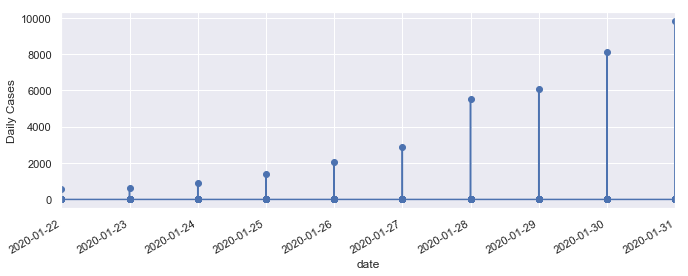

In [46]:
ax = data_index.loc['2020-01-01':'2020-01-31', 'confirm_case'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Cases')

Text(0, 0.5, 'Daily Cases')

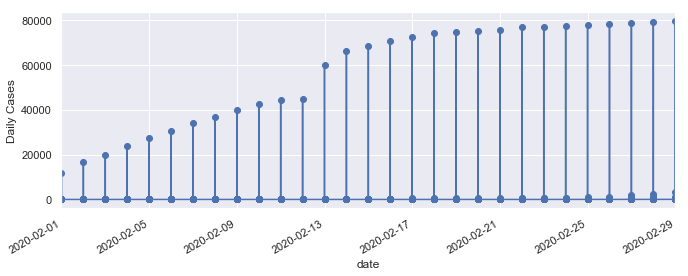

In [47]:
ax = data_index.loc['2020-02-01':'2020-02-29', 'confirm_case'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Cases')

Text(0, 0.5, 'Daily Cases')

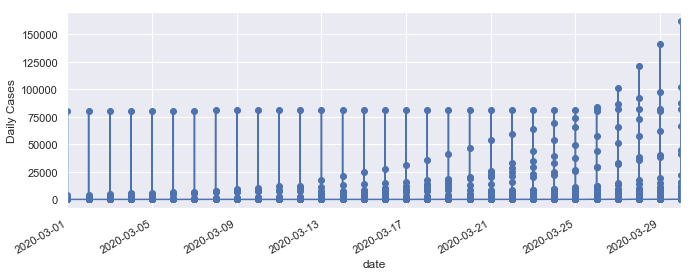

In [48]:
ax = data_index.loc['2020-03-01':'2020-03-31', 'confirm_case'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Cases')

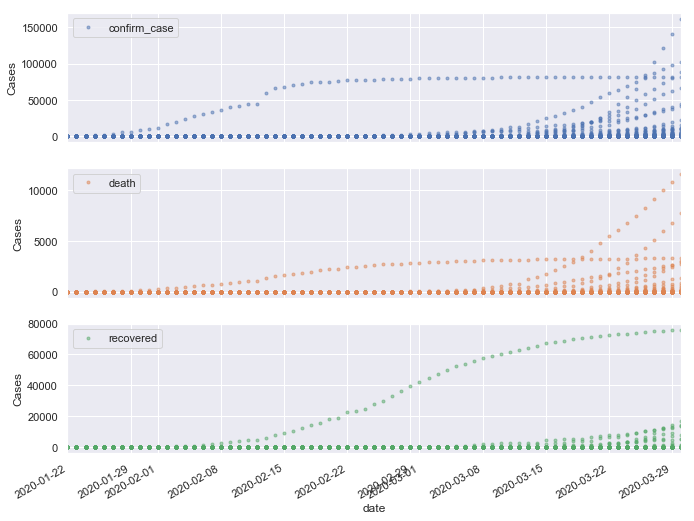

In [53]:
cols_plot = ['confirm_case', 'death', 'recovered']
axes = data_index[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Cases')